# Final Hackthon

#### Business Case

Broadband outage issue has now significantly increased now a days. As we know that Broadband service providers strive to provide the best possible services to customers & broadband outages are taken very seriously because it effects the users experience & inturn also impacts the Business revenue. 'India Broadband' is a one of such broadband service provider company that is experiencing a lot of customer churn due to customer dissatisfaction because of broadband outage.The company has now curated a dataset, where it tracks several variables that it believes impact the outage_duration.The basic idea here to analyze to get a fair idea about the factors affecting the usage of Broadbands due to diferent outage durations based on various features.

In [ ]:
#### ML problem statement

# Importing Packages

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import neighbors
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import mode
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4

In [119]:
train_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/train_data.csv')
broadband_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/broadband_data.csv')
outage_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/outage_data.csv')
report_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/report_data.csv')
server_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/server_data.csv')
Submission_file = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/submission_file.csv')

In [ ]:
##### Printing the shape of all the data files

In [20]:
print(broadband_data.shape)
print(outage_data.shape)
print(report_data.shape)
print(server_data.shape)
print(train_data.shape)
print(Submission_file.shape)

(21076, 2)
(18552, 2)
(58671, 3)
(31170, 2)
(5904, 3)
(1477, 2)


In [ ]:
##### Checking the unique columes in each of the Data sets

In [21]:
print(outage_data.nunique())
print('\n')
print(train_data.nunique())
print('\n')
print(broadband_data.nunique())
print('\n')
print(server_data.nunique())
print('\n')
print(report_data.nunique())
print('\n')
print(Submission_file.nunique())
print('\n')

id             18552
outage_type        5
dtype: int64


id                 5904
area_code           876
outage_duration       3
dtype: int64


id                18552
broadband_type       10
dtype: int64


id                     18552
transit_server_type       53
dtype: int64


id                 18552
log_report_type      386
volume               341
dtype: int64


id                 1421
outage_duration       3
dtype: int64




In [ ]:
##### Checking the missing values for all the Data files

In [22]:
print('\n Total missing values in train :',train_data.isna().sum().sum())
print('\n Total missing values in broadband :',broadband_data.isna().sum().sum())
print('\n Total missing values in outage :',outage_data.isna().sum().sum())
print('\n Total missing values in report :',report_data.isna().sum().sum())
print('\n Total missing values in server :',server_data.isna().sum().sum())
print('\n Total missing values in test :',Submission_file.isna().sum().sum())


 Total missing values in train : 0

 Total missing values in broadband : 0

 Total missing values in outage : 0

 Total missing values in report : 0

 Total missing values in server : 0

 Total missing values in test : 0


In [23]:
train_data.head()

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


Train Data has three columns:

1.ID

2.Area Code

3.Outage Duration

In [24]:
train_data['area_code'].value_counts().head(10)

area_821     67
area_1107    61
area_126     59
area_1008    57
area_734     57
area_600     55
area_704     50
area_810     49
area_1052    48
area_122     47
Name: area_code, dtype: int64

In [ ]:
#### From the value counts data we can say that Area_821 is repeated most of the times in the data

In [ ]:
### Checking the distribution of outage duration in train data

In [25]:
train_data['outage_duration'].value_counts()

0    3827
1    1496
2     581
Name: outage_duration, dtype: int64

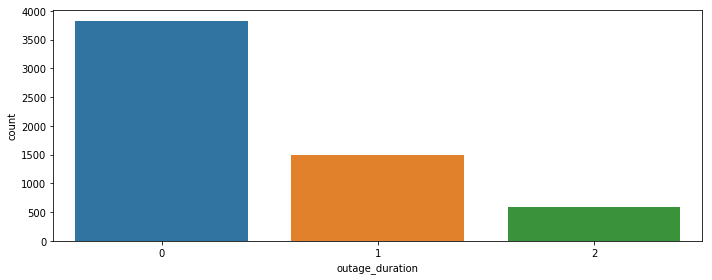

In [26]:
#count plot for Outage Duration 

plt.figure(figsize = (10,4))
sns.countplot(train_data['outage_duration'])
plt.tight_layout()
plt.show()

In [28]:
value=list(train_data['outage_duration'].value_counts())
for i in range(len(value)):
    print(train_data['outage_duration'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

0 65 %
1 25 %
2 10 %


### Data Insight - From the above distribution of outage classes we can say that samples with no outage are very high compared to the one with outage, Frequency decreases as outage classes increases. It gives us an indication that the target has class imbalance.

In [ ]:
### Maximum Outage Duration With Respect to Area

In [37]:
train_data_outage = train_data.loc[train_data.outage_duration==2,'area_code'].value_counts()

In [38]:
train_data_outage

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
area_704     19
area_810     18
area_1019    18
area_798     17
area_834     17
area_684     17
area_995     16
area_962     15
area_1086    14
area_1008    13
area_653     13
area_763     12
area_613     12
area_846     12
area_845     11
area_638     10
area_1052    10
area_1042    10
area_1075     8
area_895      8
area_976      8
area_1061     7
area_921      6
area_892      5
area_599      5
             ..
area_1017     1
area_632      1
area_989      1
area_566      1
area_957      1
area_937      1
area_924      1
area_967      1
area_32       1
area_645      1
area_856      1
area_1103     1
area_774      1
area_481      1
area_87       1
area_1014     1
area_915      1
area_893      1
area_956      1
area_618      1
area_1049     1
area_767      1
area_1016     1
area_778      1
area_998      1
area_1090     1
area_1112     1
area_974      1
area_551      1
area_1119     1
Name: area_code, Length:

### From above data we can say that area_1100,area_1107,area_600 are most prone to long outage durations & area_1100  faces maximum outage.

### Outage_Data

● outage_data.csv: For each of the event ids mentioned in the train_data.csv and test_data.csv files and also some additional ids there is a record of the outage_type that is stored in the dataset. There are tota 5 different outage_type's recorded in the dataset.

In [39]:
outage_data.shape

(18552, 2)

### There are total two columns and 18852 rows

### Plotting the number of counts vs Outage Type

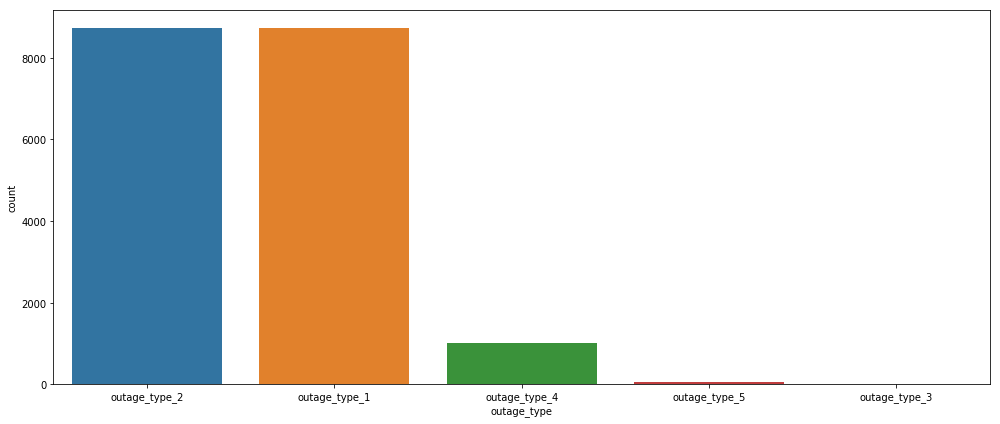

In [40]:
#count plot for Outage Duration

plt.figure(figsize = (14,6))
sns.countplot(outage_data['outage_type'])
plt.tight_layout()
plt.show()

#### From above graph Outage type 2 and Outage type 1 are the most repeated in the data

In [41]:
outage_data['outage_type'].value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_5      65
outage_type_3       8
Name: outage_type, dtype: int64

##### Here we are able to see the value counts for each outage type

##### Checking the outage type in percentage form

In [43]:
value=list(outage_data['outage_type'].value_counts())
for i in range(len(value)):
    print(outage_data['outage_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

outage_type_2 65 %
outage_type_1 25 %
outage_type_4 10 %


IndexError: list index out of range

### Converting outage type to numerical data

In [44]:
outage_data.outage_type=outage_data.outage_type.apply(lambda x: int(x.split("_")[2]))

In [45]:
outage_data.head()

,id,outage_type
0,6597,2
1,8011,2
2,2597,2
3,5022,1
4,6852,1


#### Applying Dummification on column Outage type

In [46]:
outage_type_dummies = pd.get_dummies(outage_data,columns=['outage_type'])

In [47]:
outage_type_dummies.head()

,id,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0


In [48]:
outage_data.describe(include='all')

,id,outage_type
count,18552.000000,18552.000000
mean,9276.500000,1.649795
std,5355.645433,0.773591
min,1.000000,1.000000
25%,4638.750000,1.000000
50%,9276.500000,2.000000
75%,13914.250000,2.000000
max,18552.000000,5.000000


From above analysis we can say that

1)total count is 18552

2)Outage type 2 is repeated most times(8737 times)

3)There are total 5 level's of Outage type

# Server_Data

In [49]:
server_data.head()

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


In [50]:
server_data.shape

(31170, 2)

There are total 31170 rows & 2 columns

In [51]:
server_data.nunique().value_counts()

53       1
18552    1
dtype: int64

out of 31170 ID's 18552 are unique & Total there are 53 Server type

# Checking the Value count for server type

In [52]:
server_count = server_data['transit_server_type'].value_counts()
server_count

transit_server_type_11    7888
transit_server_type_35    6615
transit_server_type_34    5927
transit_server_type_15    4395
transit_server_type_20    1458
transit_server_type_54     684
transit_server_type_13     582
transit_server_type_42     478
transit_server_type_44     466
transit_server_type_23     429
transit_server_type_14     330
transit_server_type_43     306
transit_server_type_22     223
transit_server_type_50     154
transit_server_type_10     145
transit_server_type_21     136
transit_server_type_18      73
transit_server_type_47      69
transit_server_type_26      65
transit_server_type_32      63
transit_server_type_30      60
transit_server_type_45      53
transit_server_type_24      46
transit_server_type_27      44
transit_server_type_29      42
transit_server_type_40      40
transit_server_type_46      38
transit_server_type_2       37
transit_server_type_28      32
transit_server_type_8       29
transit_server_type_6       28
transit_server_type_5       26
transit_

#### Checking the Value count for server type in percentage form

In [58]:
val=list(server_data['transit_server_type'].value_counts().head(15))
for i in range(len(val)):
    print(server_data['transit_server_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

transit_server_type_11 26 %
transit_server_type_35 22 %
transit_server_type_34 20 %
transit_server_type_15 15 %
transit_server_type_20 5 %
transit_server_type_54 2 %
transit_server_type_13 2 %
transit_server_type_42 2 %
transit_server_type_44 2 %
transit_server_type_23 1 %
transit_server_type_14 1 %
transit_server_type_43 1 %
transit_server_type_22 1 %
transit_server_type_50 1 %
transit_server_type_10 0 %


In [59]:
server_count.head()

transit_server_type_11    7888
transit_server_type_35    6615
transit_server_type_34    5927
transit_server_type_15    4395
transit_server_type_20    1458
Name: transit_server_type, dtype: int64

In [60]:
server_data.head()

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


From above plot we can say that server_type_11 is used most

#### We will convert transit server type into numerical data type.

In [62]:
server_data.transit_server_type=server_data.transit_server_type.apply(lambda x: int(x.split("_")[3]))

In [63]:
server_data.head(10)

,id,transit_server_type
0,6597,11
1,8011,15
2,2597,15
3,5022,15
4,5022,11
5,6852,11
6,6852,15
7,5611,15
8,14838,15
9,14838,11


#### Plotting Server type Count

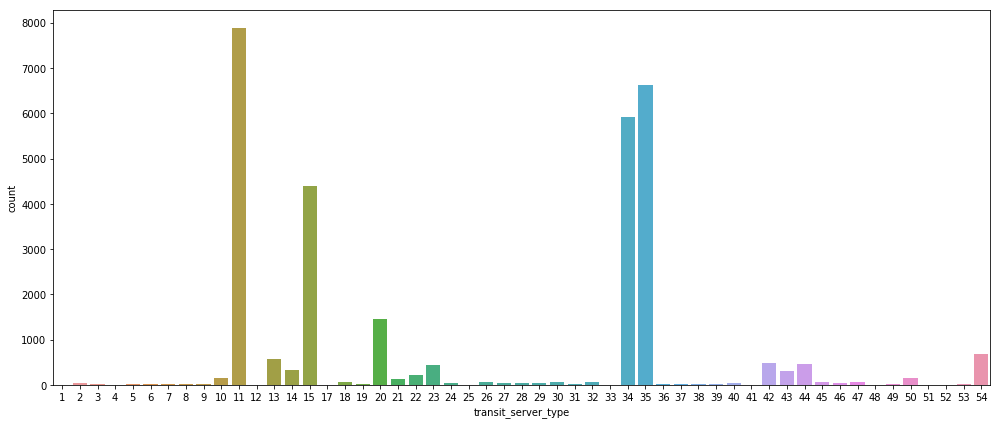

In [64]:
#count plot for transit server type

plt.figure(figsize = (14,6))
sns.countplot(server_data['transit_server_type'])
plt.tight_layout()
plt.show()

In [65]:
server_data['transit_server_type'].value_counts().sum()

31170

#### we will perform Dummification on server type column.

In [66]:
server_type_dummies = pd.get_dummies(server_data,columns=['transit_server_type'])

In [67]:
server_type_dummies

,id,transit_server_type_1,transit_server_type_2,transit_server_type_3,transit_server_type_4,transit_server_type_5,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9,...,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54
0,6597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6852,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6852,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5611,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14838,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,14838,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
server_type_dummies.shape

(31170, 54)

## Report Data

In [69]:
report_data.head()

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [70]:
report_data.shape

(58671, 3)

In [71]:
report_data.nunique()

id                 18552
log_report_type      386
volume               341
dtype: int64

There are total 58671 ID & 3 column

There are total 386 log report type

There are 341 Volumes

#### Value Count for Log Report Type

In [72]:
log_report_ = report_data['log_report_type'].value_counts()

In [73]:
log_report_.head(10)

log_report_type_312    5267
log_report_type_232    4754
log_report_type_82     3472
log_report_type_203    2823
log_report_type_313    2145
log_report_type_233    1901
log_report_type_307    1597
log_report_type_54     1573
log_report_type_170    1526
log_report_type_71     1514
Name: log_report_type, dtype: int64

In [74]:
val=list(report_data['log_report_type'].value_counts().head(20))
for i in range(len(val)):
    print(report_data['log_report_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

log_report_type_312 14 %
log_report_type_232 12 %
log_report_type_82 9 %
log_report_type_203 7 %
log_report_type_313 6 %
log_report_type_233 5 %
log_report_type_307 4 %
log_report_type_54 4 %
log_report_type_170 4 %
log_report_type_71 4 %
log_report_type_315 4 %
log_report_type_134 4 %
log_report_type_80 3 %
log_report_type_235 3 %
log_report_type_193 3 %
log_report_type_219 3 %
log_report_type_68 3 %
log_report_type_227 3 %
log_report_type_314 2 %
log_report_type_201 2 %


In [75]:
report_data.log_report_type=report_data.log_report_type.apply(lambda x: int(x.split("_")[3]))

In [76]:
report_data.head()

,id,log_report_type,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1


In [77]:
log_report_.head(10)

log_report_type_312    5267
log_report_type_232    4754
log_report_type_82     3472
log_report_type_203    2823
log_report_type_313    2145
log_report_type_233    1901
log_report_type_307    1597
log_report_type_54     1573
log_report_type_170    1526
log_report_type_71     1514
Name: log_report_type, dtype: int64

In [78]:
report_data.head()

,id,log_report_type,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1


In [79]:
report_data.shape

(58671, 3)

# Broadband Data

In [80]:
broadband_data.head()

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


In [81]:
broadband_data.shape

(21076, 2)

In [82]:
broadband_data.nunique()

id                18552
broadband_type       10
dtype: int64

Out of total 21076 ID there are 18552 Unique ID & 10 Broadband types

In [83]:
broadband_data['broadband_type'].value_counts()

broadband_type_8     10268
broadband_type_2      8918
broadband_type_6       582
broadband_type_7       498
broadband_type_4       330
broadband_type_9       190
broadband_type_3       145
broadband_type_10       73
broadband_type_1        58
broadband_type_5        14
Name: broadband_type, dtype: int64

#### Percentage of Broadband types using value count

In [86]:
val=list(broadband_data['broadband_type'].value_counts())
for i in range(len(val)):
    print(broadband_data['broadband_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

broadband_type_8 49 %
broadband_type_2 42 %
broadband_type_6 3 %
broadband_type_7 2 %
broadband_type_4 2 %
broadband_type_9 1 %
broadband_type_3 1 %
broadband_type_10 0 %
broadband_type_1 0 %
broadband_type_5 0 %


#### Seperating text & number from broadband type

In [87]:
broadband_data.broadband_type=broadband_data.broadband_type.apply(lambda x: int(x.split("_")[2]))

In [88]:
broadband_data.head()

,id,broadband_type
0,6597,8
1,8011,8
2,2597,8
3,5022,8
4,6852,8


### Dummification of Broadband type

we are using Dummification in order to convert categorical column to numeric 

In [90]:
broadband_type_dummies = pd.get_dummies(broadband_data,columns=['broadband_type'])

In [91]:
broadband_type_dummies

,id,broadband_type_1,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,broadband_type_10
0,6597,0,0,0,0,0,0,0,1,0,0
1,8011,0,0,0,0,0,0,0,1,0,0
2,2597,0,0,0,0,0,0,0,1,0,0
3,5022,0,0,0,0,0,0,0,1,0,0
4,6852,0,0,0,0,0,0,0,1,0,0
5,5611,0,0,0,0,0,0,0,1,0,0
6,14838,0,0,0,0,0,0,0,1,0,0
7,2588,0,0,0,0,0,0,0,1,0,0
8,4848,0,0,0,0,0,0,0,1,0,0
9,6914,0,0,0,0,0,0,0,1,0,0


# Merging the data files

Checking Unique ID's From all the Data set's before merging

In [92]:
print("Number of unique ID's in Train Data      : ",train_data.id.nunique())
print("Number of unique ID's in Broadband Data  : ",broadband_data.id.nunique())
print("Number of unique ID's in Server Data     : ",server_data.id.nunique())
print("Number of unique ID's in Outage Data     : ",outage_data.id.nunique())
print("Number of unique ID's in Report Data     : ",report_data.id.nunique())

Number of unique ID's in Train Data      :  5904
Number of unique ID's in Broadband Data  :  18552
Number of unique ID's in Server Data     :  18552
Number of unique ID's in Outage Data     :  18552
Number of unique ID's in Report Data     :  18552


# Merging Train_Data & Broadband_Data

We have merged train & broadband data files as we have common column present in these files (i.e id)

In [93]:
train_broadband_merged = pd.merge(train_data,broadband_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [94]:
train_broadband_merged.head()

,id,area_code,outage_duration,broadband_type
0,13366,area_415,1,2
1,6783,area_474,0,2
2,9519,area_931,1,8
3,10202,area_700,1,8
4,4555,area_600,2,8


In [95]:
broad_band=train_broadband_merged.broadband_type.value_counts()

In [96]:
broad_band

8     3246
2     2851
6      201
7      179
4      114
9       61
3       44
10      28
1       27
5        3
Name: broadband_type, dtype: int64

### Answering questions from the operations team:

In [ ]:
### Which broadband types are suspect of long outage durations?

In [97]:
train_broadband_outage = train_broadband_merged.loc[train_broadband_merged.outage_duration==2,'broadband_type'].value_counts()

In [98]:
train_broadband_outage

8     544
2      82
6      26
4      17
1      10
7       9
9       4
3       4
5       3
10      1
Name: broadband_type, dtype: int64

From above merging we can say that broadband_type_8 are more suspect for long outage.

##  Which areas are most prone to long outage durations?

#### Creating new df Long outage my taking outage duration = 2 only

In [99]:
long_outage = train_data['outage_duration']==2
long_outage.head()

0    False
1    False
2    False
3    False
4     True
Name: outage_duration, dtype: bool

In [100]:
long_outage_ = train_data[long_outage]

In [101]:
long_outage_.head()

,id,area_code,outage_duration
4,4555,area_600,2
16,1373,area_962,2
24,4209,area_1086,2
32,8984,area_976,2
34,14361,area_704,2


In [102]:
count=long_outage_.area_code.value_counts()

In [103]:
count

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
area_704     19
area_810     18
area_1019    18
area_798     17
area_834     17
area_684     17
area_995     16
area_962     15
area_1086    14
area_1008    13
area_653     13
area_763     12
area_613     12
area_846     12
area_845     11
area_638     10
area_1052    10
area_1042    10
area_1075     8
area_895      8
area_976      8
area_1061     7
area_921      6
area_892      5
area_599      5
             ..
area_1017     1
area_632      1
area_989      1
area_566      1
area_957      1
area_937      1
area_924      1
area_967      1
area_32       1
area_645      1
area_856      1
area_1103     1
area_774      1
area_481      1
area_87       1
area_1014     1
area_915      1
area_893      1
area_956      1
area_618      1
area_1049     1
area_767      1
area_1016     1
area_778      1
area_998      1
area_1090     1
area_1112     1
area_974      1
area_551      1
area_1119     1
Name: area_code, Length:

### From above analysis we can say that area_1100 has max outages & is most prone to long outages.

#### Defining a function to remove the text from the area code

In [104]:
def str_to_num(string):
    return int(string.split("_")[1])

In [105]:
train_data["area_code"]=train_data["area_code"].apply(str_to_num)

In [106]:
train_data.head()

,id,area_code,outage_duration
0,13366,415,1
1,6783,474,0
2,9519,931,1
3,10202,700,1
4,4555,600,2


### Merging Train Data & Outage Data

In [107]:
merge_1 = train_data.merge(outage_data,how="left",left_on=["id"],right_on=["id"])

In [108]:
merge_1.head()

,id,area_code,outage_duration,outage_type
0,13366,415,1,4
1,6783,474,0,2
2,9519,931,1,2
3,10202,700,1,1
4,4555,600,2,2


In [109]:
merge_1.set_index("id",inplace=True)

In [110]:
merge_1.describe()

,area_code,outage_duration,outage_type
count,5904.000000,5904.000000,5904.000000
mean,623.909045,0.450203,1.656673
std,320.360280,0.666642,0.759276
min,1.000000,0.000000,1.000000
25%,375.000000,0.000000,1.000000
50%,661.000000,0.000000,2.000000
75%,892.000000,1.000000,2.000000
max,1126.000000,2.000000,5.000000


#### Creating a new feature by grouping area code and outage duration

In [111]:
merge_1["num"]=merge_1.groupby(['area_code',"outage_duration"]).cumcount()+1

In [112]:
merge_1[(merge_1["area_code"]==1) & (merge_1["outage_duration"]==1)]

,area_code,outage_duration,outage_type,num
id,,,,
9664,1,1,2,1
3952,1,1,1,2
15952,1,1,1,3
1235,1,1,1,4
14595,1,1,2,5
5280,1,1,1,6
17041,1,1,1,7


Num is representing number of outages of each type in an area to understand in which area what type of outage is more so that we can reduce it

In [113]:
merge_1.num.value_counts().head(10)

1     1386
2      862
3      586
4      434
5      342
6      285
7      241
8      209
9      183
10     166
Name: num, dtype: int64

### Merging Train Data with Server Data

In [114]:
server_data

,id,transit_server_type
0,6597,11
1,8011,15
2,2597,15
3,5022,15
4,5022,11
5,6852,11
6,6852,15
7,5611,15
8,14838,15
9,14838,11


In [115]:
merge_2=server_data.merge(train_data, on='id')

In [116]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration
0,8011,15,1,0
1,2588,15,1,0
2,2588,11,1,0
3,4848,11,1,0
4,4848,15,1,0


#### Checking if any null value is present in above merged data 

In [117]:
merge_2.isnull().sum()

id                     0
transit_server_type    0
area_code              0
outage_duration        0
dtype: int64

#### Checking for unique values present in above merged data

In [118]:
merge_2.nunique()

id                     5904
transit_server_type      49
area_code               876
outage_duration           3
dtype: int64

In [119]:
merge_2.shape

(9968, 4)

we have 9968 rows & 4 columns

### Assigning value counts in DF

In [120]:
transit_server_type_unq=pd.DataFrame(merge_2.transit_server_type.value_counts())
transit_server_type_unq.head()

,transit_server_type
11,2473
35,2158
34,1925
15,1370
20,437


#### Creating New Column to check the Percentage of transit Server Type

In [121]:
transit_server_type_unq["percent_trn"]=merge_2.transit_server_type.value_counts(normalize=True)*100

In [122]:
transit_server_type_unq.head()

,transit_server_type,percent_trn
11,2473,24.809390
35,2158,21.649278
34,1925,19.311798
15,1370,13.743981
20,437,4.384029


In [123]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration
0,8011,15,1,0
1,2588,15,1,0
2,2588,11,1,0
3,4848,11,1,0
4,4848,15,1,0


#### Creating New Feature Num by Grouping  Server Type and Area Code

In [124]:
merge_2["num"]=merge_2.groupby(['transit_server_type','area_code']).cumcount()+1

In [126]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration,num
0,8011,15,1,0,1
1,2588,15,1,0,2
2,2588,11,1,0,1
3,4848,11,1,0,2
4,4848,15,1,0,3


#### Merging Train Data with Broadband Data

In [128]:
train_broadband_combined_ = pd.merge(train_data,broadband_data,left_on = ['id'],
                               right_on = ['id'],how='left')

#### Assigning Max Outage Duration : 2 to Long Outage

In [129]:
long_outage_2 = train_broadband_combined_['outage_duration']==2
long_outage_2.head()

0    False
1    False
2    False
3    False
4     True
Name: outage_duration, dtype: bool

In [130]:
long_outage_2_=train_broadband_combined_[long_outage_2]

In [131]:
long_outage_2_.head()

,id,area_code,outage_duration,broadband_type
4,4555,600,2,8
16,1373,962,2,8
24,4209,1086,2,8
33,8984,976,2,8
35,14361,704,2,8


In [132]:
broad_band=long_outage_2_.broadband_type.value_counts()

In [133]:
broad_band

8     544
2      82
6      26
4      17
1      10
7       9
9       4
3       4
5       3
10      1
Name: broadband_type, dtype: int64

clearly Broadband type 8 has Highest and longest Outage Duration from above analysis. 

## Merging Train_Data & Server_Data

In [134]:
train_server_combined_1 = pd.merge(train_data,server_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [135]:
train_server_combined_1

,id,area_code,outage_duration,transit_server_type
0,13366,415,1,35
1,6783,474,0,35
2,6783,474,0,34
3,9519,931,1,15
4,10202,700,1,11
5,4555,600,2,15
6,5281,645,0,46
7,5281,645,0,47
8,1872,576,0,11
9,8729,734,1,15


#### Assigning Outage 2 to long outage

In [136]:
long_outage_3 = train_server_combined_1['outage_duration']==2
long_outage_3.head()

0    False
1    False
2    False
3    False
4    False
Name: outage_duration, dtype: bool

In [137]:
long_outage_3_=train_server_combined_1[long_outage_3]

In [138]:
server_outage=long_outage_3_.transit_server_type.value_counts()
server_outage.head(10)

15    414
11    324
54     39
44     34
42     34
13     26
20     23
43     18
14     17
50      7
Name: transit_server_type, dtype: int64

#### Transit server type 15 and 11 are used most in the data as custombers are using it more so it might also be more prone to outages

### Merge1 train and Server data

In [125]:
train_server_merge_1 = pd.merge(train_data,server_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [126]:
train_server_merge_1.head(5)

,id,area_code,outage_duration,transit_server_type
0,13366,area_415,1,transit_server_type_35
1,6783,area_474,0,transit_server_type_35
2,6783,area_474,0,transit_server_type_34
3,9519,area_931,1,transit_server_type_15
4,10202,area_700,1,transit_server_type_11


In [127]:
train_server_merge_1.shape

(9968, 4)

### Merge2 Train and Outage Data

In [128]:
train_outage_merge_2 = pd.merge(train_data,outage_data,left_on = ['id'],
                               right_on = ['id'],how='left')


In [129]:
train_outage_merge_2.head()

,id,area_code,outage_duration,outage_type
0,13366,area_415,1,outage_type_4
1,6783,area_474,0,outage_type_2
2,9519,area_931,1,outage_type_2
3,10202,area_700,1,outage_type_1
4,4555,area_600,2,outage_type_2


In [130]:
train_outage_merge_2.shape

(5904, 4)

In [131]:
temp = train_outage_merge_2.area_code.value_counts().head(50)

In [132]:
len(temp)

50

### Merge 3 Train & Report Data

In [133]:
train_report_merge_3 = pd.merge(train_data,report_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [134]:
train_report_merge_3.head()

,id,area_code,outage_duration,log_report_type,volume
0,13366,area_415,1,log_report_type_312,1
1,6783,area_474,0,log_report_type_312,2
2,6783,area_474,0,log_report_type_233,1
3,6783,area_474,0,log_report_type_232,1
4,6783,area_474,0,log_report_type_315,2


### Merge 4 Train Data & Broadband Data

In [135]:
train_broadband_merge_4 = pd.merge(train_data,broadband_data,left_on = ['id'],
                               right_on = ['id'],how='left')


In [136]:
train_broadband_merge_4.head()

,id,area_code,outage_duration,broadband_type
0,13366,area_415,1,broadband_type_2
1,6783,area_474,0,broadband_type_2
2,9519,area_931,1,broadband_type_8
3,10202,area_700,1,broadband_type_8
4,4555,area_600,2,broadband_type_8


In [137]:
train_broadband_merge_4.shape

(6754, 4)

### Merging with Train, Server and Outage Individually

In [138]:
train_server_outage = pd.merge(train_server_merge_1,train_outage_merge_2,left_on = ['id'],
                               right_on = ['id'],how='left')

In [139]:
train_server_outage.head()

,id,area_code_x,outage_duration_x,transit_server_type,area_code_y,outage_duration_y,outage_type
0,13366,area_415,1,transit_server_type_35,area_415,1,outage_type_4
1,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2
2,6783,area_474,0,transit_server_type_34,area_474,0,outage_type_2
3,9519,area_931,1,transit_server_type_15,area_931,1,outage_type_2
4,10202,area_700,1,transit_server_type_11,area_700,1,outage_type_1


In [140]:
train_server_outage.shape

(9968, 7)

### Merging Train & Broadband Data & Report Data

In [141]:
train_broadband_report = pd.merge(train_broadband_merge_4,train_report_merge_3,left_on = ['id'],
                               right_on = ['id'],how='left')


In [142]:
train_broadband_report.head()

,id,area_code_x,outage_duration_x,broadband_type,area_code_y,outage_duration_y,log_report_type,volume
0,13366,area_415,1,broadband_type_2,area_415,1,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,area_474,0,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,area_474,0,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,area_474,0,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,area_474,0,log_report_type_315,2


In [143]:
train_broadband_report.shape


(22679, 8)

### Final Merge of EDA and Visualization

In [144]:
final_merge = pd.merge(train_server_outage,train_broadband_report,left_on = ['id'],
                               right_on = ['id'],how='left')

In [145]:
final_merge.head()

,id,area_code_x_x,outage_duration_x_x,transit_server_type,area_code_y_x,outage_duration_y_x,outage_type,area_code_x_y,outage_duration_x_y,broadband_type,area_code_y_y,outage_duration_y_y,log_report_type,volume
0,13366,area_415,1,transit_server_type_35,area_415,1,outage_type_4,area_415,1,broadband_type_2,area_415,1,log_report_type_312,1
1,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2,area_474,0,broadband_type_2,area_474,0,log_report_type_312,2
2,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2,area_474,0,broadband_type_2,area_474,0,log_report_type_233,1
3,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2,area_474,0,broadband_type_2,area_474,0,log_report_type_232,1
4,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2,area_474,0,broadband_type_2,area_474,0,log_report_type_315,2


In [146]:
final_merge = final_merge.drop_duplicates('id')

In [147]:
final_merge.shape

(5904, 14)

In [148]:
final_merge.nunique().value_counts

<bound method IndexOpsMixin.value_counts of id                     5904
area_code_x_x           876
outage_duration_x_x       3
transit_server_type      44
area_code_y_x           876
outage_duration_y_x       3
outage_type               5
area_code_x_y           876
outage_duration_x_y       3
broadband_type            9
area_code_y_y           876
outage_duration_y_y       3
log_report_type         213
volume                  139
dtype: int64>

In [149]:
final_merge.head()

,id,area_code_x_x,outage_duration_x_x,transit_server_type,area_code_y_x,outage_duration_y_x,outage_type,area_code_x_y,outage_duration_x_y,broadband_type,area_code_y_y,outage_duration_y_y,log_report_type,volume
0,13366,area_415,1,transit_server_type_35,area_415,1,outage_type_4,area_415,1,broadband_type_2,area_415,1,log_report_type_312,1
1,6783,area_474,0,transit_server_type_35,area_474,0,outage_type_2,area_474,0,broadband_type_2,area_474,0,log_report_type_312,2
13,9519,area_931,1,transit_server_type_15,area_931,1,outage_type_2,area_931,1,broadband_type_8,area_931,1,log_report_type_203,3
16,10202,area_700,1,transit_server_type_11,area_700,1,outage_type_1,area_700,1,broadband_type_8,area_700,1,log_report_type_54,1
17,4555,area_600,2,transit_server_type_15,area_600,2,outage_type_2,area_600,2,broadband_type_8,area_600,2,log_report_type_82,30


### Feature Engineering

Reading all csv files and test data again

In [10]:
train_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/train_data.csv')
broadband_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/broadband_data.csv')
outage_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/outage_data.csv')
report_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/report_data.csv')
server_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/server_data.csv')
test_data = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/test_data.csv',header=0,sep=",")
Submission_file = pd.read_csv('C:/Users/Sandeep/Desktop/Final Hack/data File/submission_file.csv')

a) In feature as we are going to use dummification we have concatinated both test data and train data

b) We will create a new column called source (train/test) as we have concatinated the data

In [11]:
train_data['source']='train'
test_data['source']='test'
data = pd.concat(objs=[train_data, test_data], axis=0, ignore_index=True)
print(data.head(5))
print(data.shape)
print("\n")
print(train_data.shape)
print("\n")
print(test_data.shape)
print("\n")
#print(len(data['area_code'].unique()))
print(data['outage_duration'].value_counts())

  area_code     id  outage_duration source
0  area_415  13366              1.0  train
1  area_474   6783              0.0  train
2  area_931   9519              1.0  train
3  area_700  10202              1.0  train
4  area_600   4555              2.0  train
(7381, 4)


(5904, 4)


(1477, 3)


0.0    3827
1.0    1496
2.0     581
Name: outage_duration, dtype: int64


#### Feature Engineering ON SERVER DATA

We are doing Feature engineering by calculating the contribution of each column towards our target varibale i.e outage duration

#### Feature engineering by doing below calculations

1. Percen = Percentage contribution of feature in the train data
    
2. Mod_srv= Highest outage occured for given feature using MODE

 And going forward we can find this calculations for other variables too.

In [12]:
server_data = server_data.merge(data, on='id')
server_data1 = pd.DataFrame(server_data['transit_server_type'].value_counts())
display(server_data.head())
display(server_data1.head())

,id,transit_server_type,area_code,outage_duration,source
0,8011,transit_server_type_15,area_1,0.0,train
1,2588,transit_server_type_15,area_1,0.0,train
2,2588,transit_server_type_11,area_1,0.0,train
3,4848,transit_server_type_11,area_1,0.0,train
4,4848,transit_server_type_15,area_1,0.0,train


,transit_server_type
transit_server_type_11,3068
transit_server_type_35,2693
transit_server_type_34,2411
transit_server_type_15,1724
transit_server_type_20,557


#### Here we are checking the contribution of the individual Transit Server Type to Train Data with respect to complete data 
#### which will help us in understanding most used transit server type

In [13]:
server_data1['Percen'] = server_data.pivot_table(values='source',index='transit_server_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
display(server_data1.tail(11))

,transit_server_type,Percen
transit_server_type_31,5,0.60
transit_server_type_53,5,0.80
transit_server_type_19,4,0.75
transit_server_type_37,4,1.00
transit_server_type_51,3,1.00
transit_server_type_9,3,1.00
transit_server_type_12,2,1.00
transit_server_type_25,1,1.00
transit_server_type_41,1,1.00
transit_server_type_48,1,1.00


 Applying the 2nd calculation we discussed above i.e Checking Maximum occured value for outage duration for each transit server type in given server data

In [14]:
## Mode[0]= 1st highest mode value 
server_data1['Mode_srv'] = server_data.loc[server_data['source']=='train'].pivot_table(values='outage_duration',index='transit_server_type', aggfunc=lambda x: mode(x).mode[0])
print(server_data1.head(11))
## Maximum occured value(0,1,2) for outage duration for each transit server type in given server data

                        transit_server_type    Percen  Mode_srv
transit_server_type_11                 3068  0.806063       0.0
transit_server_type_35                 2693  0.801337       0.0
transit_server_type_34                 2411  0.798424       0.0
transit_server_type_15                 1724  0.794664       0.0
transit_server_type_20                  557  0.784560       0.0
transit_server_type_54                  264  0.768939       1.0
transit_server_type_13                  247  0.813765       1.0
transit_server_type_23                  198  0.803030       0.0
transit_server_type_42                  185  0.800000       0.0
transit_server_type_44                  178  0.797753       0.0
transit_server_type_14                  144  0.791667       0.0


In [15]:
#checking bottom 15 servers used least by train data 
server_data1.iloc[-15:]
server_data1['pre_process'] = server_data1.index.values

In [16]:
# Creating a new column called pre_process

# We are Marking rows as discard which has transit server types that has no contribution to Train data given for preprocess

server_data1['pre_process'].loc[server_data1['Percen']==0] = 'discard'

# Marking rows as discard if it has no outage duration
# Marking Server Type as others_0 f it has Outage duration from Class 0
# Marking Server Type as others_1 f it has Outage duration from Class 1
# Marking Server Type as others_2 f it has Outage duration from Class 2


In [17]:
top_unchange = 15
#defining which values to want consider for feature engineering

server_data1['pre_process'].iloc[top_unchange:] = server_data1['Mode_srv'].iloc[top_unchange:].apply(lambda x: 'discard' if pd.isnull(x) else 'server_type others_%d'%int(x))

# Marking as discard if it has no outage duration for preprocess
# Marking as Server Type others_0 f it has Outage duration from Class 0 for preprocess
# Marking as Server Type others_1 f it has Outage duration from Class 1 for preprocess
# Marking as Server Type others_2 f it has Outage duration from Class 2 for preprocess

print(server_data1['pre_process'].value_counts())
print(server_data1)

server_type others_0      22
server_type others_1       7
server_type others_2       5
transit_server_type_15     1
transit_server_type_11     1
transit_server_type_20     1
transit_server_type_14     1
transit_server_type_34     1
transit_server_type_23     1
transit_server_type_54     1
transit_server_type_13     1
transit_server_type_10     1
transit_server_type_22     1
transit_server_type_21     1
transit_server_type_43     1
transit_server_type_44     1
transit_server_type_42     1
transit_server_type_35     1
Name: pre_process, dtype: int64
                        transit_server_type    Percen  Mode_srv  \
transit_server_type_11                 3068  0.806063       0.0   
transit_server_type_35                 2693  0.801337       0.0   
transit_server_type_34                 2411  0.798424       0.0   
transit_server_type_15                 1724  0.794664       0.0   
transit_server_type_20                  557  0.784560       0.0   
transit_server_type_54                  264 

In [18]:
#Based on the transit server type we are adding server data1 to the preprocess features.

server_data = server_data.merge(server_data1[['pre_process']], left_on='transit_server_type',right_index=True)
display(server_data.head())

,id,transit_server_type,area_code,outage_duration,source,pre_process
0,8011,transit_server_type_15,area_1,0.0,train,transit_server_type_15
1,2588,transit_server_type_15,area_1,0.0,train,transit_server_type_15
4,4848,transit_server_type_15,area_1,0.0,train,transit_server_type_15
6,6914,transit_server_type_15,area_1,0.0,train,transit_server_type_15
7,5337,transit_server_type_15,area_1,0.0,train,transit_server_type_15


In [19]:
#Levels reduced from 53 to 18(15+3) for Transit Server type

server_data['pre_process'].value_counts()

transit_server_type_11    3068
transit_server_type_35    2693
transit_server_type_34    2411
transit_server_type_15    1724
transit_server_type_20     557
server_type others_0       318
transit_server_type_54     264
transit_server_type_13     247
transit_server_type_23     198
transit_server_type_42     185
transit_server_type_44     178
transit_server_type_14     144
transit_server_type_43     126
server_type others_1       100
transit_server_type_22      96
transit_server_type_21      63
transit_server_type_10      58
server_type others_2        38
Name: pre_process, dtype: int64

In [20]:
#Dummification of Preproces Transit Server Type

server_merge = server_data.pivot_table(values='transit_server_type',index='id',columns='pre_process',aggfunc=lambda x: len(x), fill_value=0)
display(server_merge.shape)

(7381, 18)

Now there are 7381 rows and 18 columns

In [21]:
#Merging dummified Transit Server Type data into base data set

data = data.merge(server_merge, left_on='id', right_index=True)
data.head(3)

,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_34,transit_server_type_35,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_54
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####  Feature Engineering ON LOG REPORT DATA

In [22]:
#Below we are again applying same calculations as discussed above i.e percen and Mode severity

report_data = report_data.merge(data[['id','outage_duration','source']], on='id')
report_data1 = pd.DataFrame(report_data['log_report_type'].value_counts())
report_data1['Percen'] = report_data.pivot_table(values='source',index='log_report_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
report_data1['Mode_srv'] = report_data.loc[report_data['source']=='train'].pivot_table(values='outage_duration',index='log_report_type', aggfunc=lambda x: mode(x).mode[0])
display(len(report_data1))

331

In [23]:
# checkBottom 15 server

report_data1.iloc[-15:]
report_data1['pre_process'] = report_data1.index.values
report_data1['pre_process'].loc[report_data1['Percen']==1] = np.nan
top_unchange = 125
report_data1['pre_process'].iloc[top_unchange:] = report_data1['Mode_srv'].iloc[top_unchange:].apply(lambda x: 'discard' if pd.isnull(x) else 'log_report_type others_%d'%int(x))


In [24]:
report_data = report_data.merge(report_data1[['pre_process']], left_on='log_report_type',right_index=True)
report_data['pre_process'].value_counts() 
report_merge = report_data.pivot_table(values='volume',index='id',columns='pre_process',aggfunc=np.sum, fill_value=0)
display(report_merge.shape)
data = data.merge(report_merge, left_on='id', right_index=True)
display(data.head(3))

(7374, 127)

,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,log_report_type_8,log_report_type_80,log_report_type_81,log_report_type_82,log_report_type_83,log_report_type_85,log_report_type_86,log_report_type_87,log_report_type_94,log_report_type_95
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,2,0,6,0,0,0,0,0,0


#### Feature Engineering ON BROADBAND TYPE DATA

In [25]:
#Again applying same calculations as discussed earlier i.e percen and Mode severity

broadband_data['broadband_type'].value_counts()
broadband_data = broadband_data.merge(data[['id','outage_duration','source']], on='id')
broadband_data.head() #bydefault it takes first five rows
broadband_data1 = pd.DataFrame(broadband_data['broadband_type'].value_counts())
broadband_data1.head()

,broadband_type
broadband_type_8,4044
broadband_type_2,3585
broadband_type_6,247
broadband_type_7,225
broadband_type_4,144


In [26]:
#finding the percentage of broadband contibution

broadband_data1['Percen'] = broadband_data.pivot_table(values='source',index='broadband_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
print(broadband_data1.tail(14))

                   broadband_type    Percen
broadband_type_8             4044  0.800940
broadband_type_2             3585  0.795258
broadband_type_6              247  0.813765
broadband_type_7              225  0.795556
broadband_type_4              144  0.791667
broadband_type_9               77  0.792208
broadband_type_3               58  0.758621
broadband_type_10              35  0.800000
broadband_type_1               34  0.794118
broadband_type_5                4  0.750000


In [27]:
# finding the highest outage occured for given broadband data using MODE

broadband_data1['Mode_srv'] = broadband_data.loc[broadband_data['source']=='train'].pivot_table(values='outage_duration',index='broadband_type', aggfunc=lambda x: mode(x).mode[0])
print(broadband_data1.head(4))

                  broadband_type    Percen  Mode_srv
broadband_type_8            4044  0.800940       0.0
broadband_type_2            3585  0.795258       0.0
broadband_type_6             247  0.813765       1.0
broadband_type_7             225  0.795556       0.0


In [28]:
#Applying Dummification

broadband_data_merge = broadband_data.pivot_table(values='source',index='id',columns='broadband_type',aggfunc=lambda x: len(x), fill_value=0)

In [29]:
#Merging the broad_band_merge with data

data = data.merge(broadband_data_merge, left_on='id', right_index=True)
display(data.head(10))

,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,area_700,10202,1.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,area_600,4555,2.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,area_645,5281,0.0,train,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,area_576,1872,0.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,area_734,8729,1.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,area_326,9312,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,area_923,14880,0.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### FEATURE ENGINEERING ON OUTAGE TYPE

In [30]:
outage_data['outage_type'].value_counts()
outage_data = outage_data.merge(data[['id','outage_duration','source']], on='id')
outage_data1 = pd.DataFrame(outage_data['outage_type'].value_counts())

In [31]:
#Determining the % of outage type contribution:

outage_data1['Percen'] = outage_data.pivot_table(values='source',index='outage_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
outage_data1.head(7)

,outage_type,Percen
outage_type_2,3589,0.800502
outage_type_1,3370,0.799703
outage_type_4,388,0.788660
outage_type_5,23,0.826087
outage_type_3,4,1.000000


In [32]:
#Determine the mode of each:

outage_data1['Mode_svr'] = outage_data.loc[outage_data['source']=='train'].pivot_table(values='outage_duration',index='outage_type', aggfunc=lambda x: mode(x).mode[0])
outage_data.loc[server_data['source']=='train'].pivot_table(values='outage_duration',index='outage_type', aggfunc=lambda x: mode(x))
outage_data.loc[outage_data['outage_type']=='outage_type_3','outage_type'] = 'outage_type 5'

In [33]:
#DUMMIFICATION

outage_data_merge = outage_data.pivot_table(values='source',index='id',columns='outage_type',aggfunc=lambda x: len(x), fill_value=0)
outage_data_merge.head(6)
data = data.merge(outage_data_merge, left_on='id', right_index=True)
print(data.head(7))
print(data.shape)

  area_code     id  outage_duration source  server_type others_0  \
0  area_415  13366              1.0  train                     0   
1  area_474   6783              0.0  train                     0   
2  area_931   9519              1.0  train                     0   
3  area_700  10202              1.0  train                     0   
4  area_600   4555              2.0  train                     0   
5  area_645   5281              0.0  train                     2   
6  area_576   1872              0.0  train                     0   

   server_type others_1  server_type others_2  transit_server_type_10  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   
5                

#### FEATURE ENGINEERING on AREA CODE

In [34]:
data['area_code']

0        area_415
1        area_474
2        area_931
3        area_700
4        area_600
5        area_645
6        area_576
7        area_734
8        area_326
9        area_923
10       area_122
11       area_358
12       area_471
13       area_470
14       area_282
15       area_445
16       area_962
17       area_793
18       area_846
19       area_468
20       area_476
21       area_737
22       area_467
23       area_445
24      area_1086
25      area_1015
26       area_945
27       area_619
28       area_373
29       area_485
          ...    
7351     area_639
7352     area_148
7353     area_442
7354     area_471
7355    area_1075
7356     area_914
7357     area_777
7358     area_613
7359     area_497
7360     area_155
7361     area_653
7362    area_1042
7363     area_376
7364     area_707
7365     area_321
7366     area_810
7367     area_810
7368     area_242
7369    area_1037
7370    area_1075
7371     area_489
7372     area_242
7373     area_122
7374     area_203
7375     a

In [35]:
data['area_code'] = data['area_code'].astype('category')
data.dtypes


area_code                   category
id                             int64
outage_duration              float64
source                        object
server_type others_0           int64
server_type others_1           int64
server_type others_2           int64
transit_server_type_10         int64
transit_server_type_11         int64
transit_server_type_13         int64
transit_server_type_14         int64
transit_server_type_15         int64
transit_server_type_20         int64
transit_server_type_21         int64
transit_server_type_22         int64
transit_server_type_23         int64
transit_server_type_34         int64
transit_server_type_35         int64
transit_server_type_42         int64
transit_server_type_43         int64
transit_server_type_44         int64
transit_server_type_54         int64
discard                        int64
log_report_type others_0       int64
log_report_type others_1       int64
log_report_type others_2       int64
log_report_type_101            int64
l

In [36]:
data['area_code'] = data['area_code'].cat.codes

In [37]:
data['area_code']


0       407
1       460
2       870
3       657
4       569
5       607
6       551
7       686
8       325
9       862
10      135
11      356
12      457
13      456
14      282
15      433
16      898
17      734
18      787
19      453
20      462
21      689
22      452
23      433
24       86
25       15
26      882
27      585
28      368
29      470
       ... 
7351    601
7352    158
7353    430
7354    457
7355     75
7356    853
7357    721
7358    579
7359    482
7360    166
7361    614
7362     42
7363    371
7364    662
7365    320
7366    752
7367    752
7368    244
7369     38
7370     75
7371    473
7372    244
7373    135
7374    210
7375    748
7376    137
7377    764
7378    462
7379    374
7380     66
Name: area_code, Length: 7374, dtype: int16

In [ ]:
PREPARING FOR MODEL BUILDING

In [46]:
trainmodle = data.loc[data['source']=='train']
testmodle = data.loc[data['source']=='test']

In [48]:
trainmodle.drop('source',axis=1,inplace=True)
testmodle.drop(['source','outage_duration'],axis=1,inplace=True)

In [49]:
print(trainmodle.shape)
print(testmodle.shape)

(5897, 162)
(1477, 161)


In [50]:
#droping the source column
train_data.drop('source',axis=1,inplace=True)
test_data.drop('source',axis=1,inplace=True)

In [52]:
#Preparing the train data before splitting 
train_datax=trainmodle[trainmodle.columns[~trainmodle.columns.isin(['outage_duration'])]]
train_datay=trainmodle[trainmodle.columns[trainmodle.columns.isin(['outage_duration'])]]
print(train_datax.shape)
print(train_datay.shape)
print(testmodle.shape)

(5897, 161)
(5897, 1)
(1477, 161)


In [53]:
#Train and Test Split
x_train, x_vtest, y_train, y_vtest = train_test_split(train_datax, train_datay, test_size=0.30,random_state=123)

### MODEL BUILDING

 ### LOGISTIC REGRESSION

In [54]:
logistic=LogisticRegression(multi_class='multinomial',random_state=1,solver='lbfgs')
logistic.fit(x_train,y_train)
y_valid_pred=logistic.predict(x_vtest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_vtest, y_valid_pred))
print("Precision score: ", precision_score(y_vtest, y_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, y_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, y_valid_pred,average='macro'))

Accuracy score:  0.6717514124293785
Precision score:  0.47448840647370055
Recall score: 0.44052600080434495
F1 score: 0.408043543247953


In [ ]:
### PREDICTION ON VALIDATION DATA -FOR F1 SCORE : 40%

In [55]:
print(classification_report(y_vtest,y_valid_pred))

             precision    recall  f1-score   support

        0.0       0.69      0.96      0.80      1167
        1.0       0.25      0.01      0.01       429
        2.0       0.48      0.35      0.41       174

avg / total       0.56      0.67      0.57      1770



### RANDOM FOREST

In [56]:
rf_model = RandomForestClassifier(n_estimators=27, n_jobs= -1,random_state=1)
rf_model.fit(x_train,y_train)
rf_valid_pred=rf_model.predict(x_vtest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_vtest, rf_valid_pred))
print("Precision score: ", precision_score(y_vtest, rf_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, rf_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, rf_valid_pred,average='macro'))

Accuracy score:  0.7564971751412429
Precision score:  0.6820457671545728
Recall score: 0.667126179181848
F1 score: 0.6738695069730379


In [57]:
print(classification_report(y_vtest,rf_valid_pred))

             precision    recall  f1-score   support

        0.0       0.82      0.86      0.84      1167
        1.0       0.60      0.54      0.57       429
        2.0       0.62      0.60      0.61       174

avg / total       0.75      0.76      0.75      1770



### NAIVE BAYES

In [58]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [59]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_valid_pred=nb_model.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, nb_valid_pred))
print("Precision score: ", precision_score(y_vtest, nb_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, nb_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, nb_valid_pred,average='macro'))

Accuracy score:  0.3757062146892655
Precision score:  0.4960726088704756
Recall score: 0.5613626393699082
F1 score: 0.3764504450512898


In [60]:
print(classification_report(y_vtest,nb_valid_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.23      0.37      1167
        1.0       0.29      0.57      0.38       429
        2.0       0.24      0.89      0.38       174

avg / total       0.73      0.38      0.37      1770



### DECISION TREE

In [61]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_valid_pred=dt.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, dt_valid_pred))
print("Precision score: ", precision_score(y_vtest, dt_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, dt_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, dt_valid_pred,average='macro'))

Accuracy score:  0.6994350282485876
Precision score:  0.6162355084815951
Recall score: 0.6046930199487597
F1 score: 0.609390695261614


In [62]:
print(classification_report(y_vtest,dt_valid_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.79      0.80      1167
        1.0       0.49      0.53      0.51       429
        2.0       0.56      0.49      0.52       174

avg / total       0.70      0.70      0.70      1770



### ADABOOST CLASIFIER

In [63]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_valid_pred=ada.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, ada_valid_pred))
print("Precision score: ", precision_score(y_vtest, ada_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, ada_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, ada_valid_pred,average='macro'))

Accuracy score:  0.731638418079096
Precision score:  0.6386463517342901
Recall score: 0.5940813562035085
F1 score: 0.6086107978292117


In [64]:
print(classification_report(y_vtest,ada_valid_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.90      0.84      1167
        1.0       0.56      0.38      0.45       429
        2.0       0.57      0.51      0.54       174

avg / total       0.71      0.73      0.71      1770



### GRADIENT BOOSTING CLASSIFIER

In [65]:
from sklearn import ensemble

In [66]:
gb=ensemble.GradientBoostingClassifier()
gb.fit(x_train,y_train)
GB_valid_pred=gb.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, GB_valid_pred))
print("Precision score: ", precision_score(y_vtest, GB_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, GB_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, GB_valid_pred,average='macro'))

Accuracy score:  0.7542372881355932
Precision score:  0.6802834429101358
Recall score: 0.6630741487137196
F1 score: 0.6614193870629365


In [67]:
print(classification_report(y_vtest,GB_valid_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.89      0.85      1167
        1.0       0.63      0.40      0.49       429
        2.0       0.61      0.70      0.65       174

avg / total       0.74      0.75      0.74      1770



### PREDICTING ON TEST DATA

In [69]:
test_data_pred=rf_model.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_RF.csv",sep=",",index=False)

In [70]:
test_data_pred=gb.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_gb.csv",sep=",",index=False)

In [71]:
test_data_pred=dt.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_dt.csv",sep=",",index=False)

In [73]:
test_data_pred=ada.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_ada.csv",sep=",",index=False)

### Grid Search cv

In [74]:
param_grid = {"criterion": ['entropy'],
             'min_samples_split': [5,10,20],
             'max_depth': [2,5,10,15,30],
             'max_leaf_nodes': [100,120,135,150], }

In [96]:
dt = tree.DecisionTreeClassifier()
clf_3_cv = GridSearchCV(dt, param_grid, cv = 5,n_jobs=-1)
clf_3_cv.fit(x_train,y_train)
train_pred = clf_3_cv.predict(x_train)
test_pred = clf_3_cv.predict(x_vtest)

In [98]:
clf_3_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 100,
 'min_samples_split': 10}

In [77]:
print("Accuracy score: ", accuracy_score(y_vtest, test_pred ))
print("Precision score: ", precision_score(y_vtest, test_pred ,average='macro'))
print("Recall score:", recall_score(y_vtest, test_pred ,average='macro'))
print("F1 score:", f1_score(y_vtest, test_pred ,average='macro'))

Accuracy score:  0.7406779661016949
Precision score:  0.6620998038291831
Recall score: 0.6837121255169301
F1 score: 0.670946485627571


In [78]:
print(classification_report(y_vtest,test_pred))

             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83      1167
        1.0       0.56      0.51      0.53       429
        2.0       0.60      0.71      0.65       174

avg / total       0.74      0.74      0.74      1770



In [81]:
test_data_pred=clf_3_cv.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_cv.csv",sep=",",index=False)

#### My best Model is Grid Search Cv & Random Forest with F1 score of 0.67 on train

### Hyper-Parameter Tuning with GridSearch

In [99]:
param_grid = {"criterion": ['entropy'],
             'min_samples_split': [5,10,20,30],
             'max_depth': [2,5,6,10],
             'max_leaf_nodes': [100,150,200,250], }

In [102]:
clf_3_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 100,
 'min_samples_split': 10}

In [103]:
print("Accuracy score: ", accuracy_score(y_vtest, test_pred ))
print("Precision score: ", precision_score(y_vtest, test_pred ,average='macro'))
print("Recall score:", recall_score(y_vtest, test_pred ,average='macro'))
print("F1 score:", f1_score(y_vtest, test_pred ,average='macro'))


Accuracy score:  0.7497175141242938
Precision score:  0.6768441412554624
Recall score: 0.6653908246408912
F1 score: 0.6643287637321965


In [104]:
print(classification_report(y_vtest,test_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.87      0.84      1167
        1.0       0.62      0.44      0.52       429
        2.0       0.60      0.68      0.64       174

avg / total       0.74      0.75      0.74      1770



#### Hyper-Parameter Tuning for Random Forest

In [106]:
rfc = RandomForestClassifier()

In [107]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [108]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [110]:
train_pred = CV_rfc.predict(x_train)
test_pred = CV_rfc.predict(x_vtest)

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_vtest, test_pred))
print("Precision score: ", precision_score(y_vtest, test_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, test_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, test_pred,average='macro'))

Accuracy score:  0.7446327683615819
Precision score:  0.6669719100889006
Recall score: 0.6190496607569562
F1 score: 0.6283183156875235


In [112]:
print(classification_report(y_vtest,test_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.91      0.84      1167
        1.0       0.63      0.35      0.45       429
        2.0       0.58      0.59      0.59       174

avg / total       0.73      0.74      0.72      1770



In [116]:
test_data_pred=CV_rfc.predict(testmodle)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Sandeep_Yadav_cvrfc.csv",sep=",",index=False)


#### Q1.Which areas are most prone to long outage durations?

Answer : Area 1100 is most prone to long Outage Duration
And Other Top areas most prone to outages are as below

area_1100 : Num of outages = 28

area_600 : Num of outages = 27

area_1107 : Num of outages = 27

area_821 : Num of outages = 24

area_734 : Num of outages = 23

#### Q2.Which broadband types are suspect of long outage durations?

Answer : Broadband type 8 - ADSL 1 is most prone to long Outage Duration

broadband_type_8 - ADSL 1 : Number of outages = 544

broadband_type_2 - ADSL 2 : Number of outages = 82

broadband_type_6 - ADSL 2+ : Number of outages = 26

broadband_type_4 - Fiber1 : Number of Outages = 17

broadband_type_1 - FiberUltrs : Number of Outages = 10

#### Q3.Any other recommendations to improve the detection of outage durations.


Answer : From above visualization we can say that area_1100,area_1107,area_600 are most prone to long outage durations & area_1100 faces maximum outage.So we need to focus mainly on these areas.

Answer : Transit server type 15 and 11 are used most in the data as customers are using it more so it might also be more prone to outages.

Answer : Detecting the Outage duration by looking at the reports data & the column log_report_type.